In [2]:
import tensorflow as tf

import glob


#Dataset downloaded and unzipped on D drive
train_images = sorted(glob.glob("D:/keras_png_slices_data/keras_png_slices_train/*.png"))
train_masks = sorted(glob.glob("D:/keras_png_slices_data/keras_png_slices_seg_train/*.png"))
val_images = sorted(glob.glob("D:/keras_png_slices_data/keras_png_slices_validate/*.png"))
val_masks = sorted(glob.glob("D:/keras_png_slices_data/keras_png_slices_seg_validate/*.png"))
test_images = sorted(glob.glob("D:/keras_png_slices_data/keras_png_slices_test/*.png"))
test_masks = sorted(glob.glob("D:/keras_png_slices_data/keras_png_slices_seg_test/*.png"))

print(train_images[0])
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_masks))
val_data = tf.data.Dataset.from_tensor_slices((val_images, val_masks))
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_masks))

train_data = train_data.shuffle(len(train_images))
val_data = val_data.shuffle(len(val_images))
test_data = test_data.shuffle(len(test_images))

def pre_process(image, mask):
    img = tf.io.read_file(image)
    img = tf.image.decode_png(img, channels = 1)
    img = tf.image.resize(img, (256, 256))
    img = tf.cast(image, tf.float32)/225.0
    
    msk = tf.io.read_file(mask)
    msk = tf.image.decode_png(msk, channels = 1)
    msk = tf.image.resize(msk, (256, 256))
    msk = msk/85
    
    return img, msk

train_data = train_data.map(pre_process)
val_data = val_data.map(pre_process)
test_data = test_data.map(pre_process)


D:/keras_png_slices_data/keras_png_slices_train\case_001_slice_0.nii.png
<DatasetV1Adapter shapes: ((), ()), types: (tf.string, tf.string)>
<DatasetV1Adapter shapes: ((), (256, 256, 1)), types: (tf.float32, tf.float32)>


<DatasetV1Adapter shapes: ((), (256, 256, 1)), types: (tf.float32, tf.float32)>


TypeError: Image data of dtype object cannot be converted to float

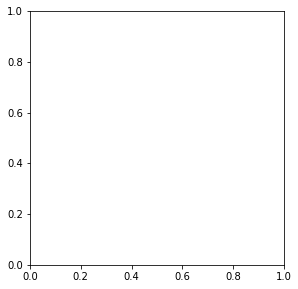